# **Insurance Claim Analysis**

## **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive

## **Loading Dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Insurance Data/insurance_data.csv")

In [4]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [5]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


### **Information About Dataset**
1. Index :- Index numbers
2. PatiendtID :- Unique Id for all patients
3. Age :- Age of person
4. Gender :- Male or Female
5. BMI :- Body mass index
6. Bloodpressire :- Bloodpressure for person
7. Diabetic :- Yes for person is diabetic
8. Children :- Number of the children of the person
9. Smoker :- Yes for person is smoker
10. Region :- Region of the person
11. Claim :- Amount claim for insurance.


In [6]:
df.shape

(1340, 11)

In [7]:
df.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [9]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [10]:
df.describe(include = "object")

,gender,diabetic,smoker,region
count,1340,1340,1340,1337
unique,2,2,2,4
top,male,No,No,southeast
freq,678,698,1066,443


**Using first column Index as index**

In [11]:
df = df.set_index('index')

**Cheking for Duplicat values**

In [12]:
df.duplicated().sum()

0

**Detecting Null values**

In [13]:
df.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [14]:
df[df['gender'] == 'male'].isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

**All null values from Age are male so filling the null values of Age column and Droping the null values of Region column**

In [15]:
df.age = df.age.fillna(round(df[df.gender == 'male'].age.mean()))

In [16]:
df.dropna(subset= 'region', inplace= True)

In [17]:
df.dtypes

PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object

**Age and Claim column have float data type so changing datatype from float to Int**

In [18]:
df.age = df.age.astype(int)
df.claim = df.claim.astype(int)

# **Data Analysis**

In [19]:
px.histogram(df,'gender', color = 'gender', text_auto= True, title='Count by Gender', template='presentation', width=500)

* **Almost Equel counts of Male and Female**

In [20]:
px.histogram(df,'diabetic', color = 'diabetic', text_auto= True, title='Count by diabetic', template='presentation', width=500)

* **Almost Equal count of Diabetic or non Diabetic person**

Text(0.5, 1.0, 'Age Distribution')

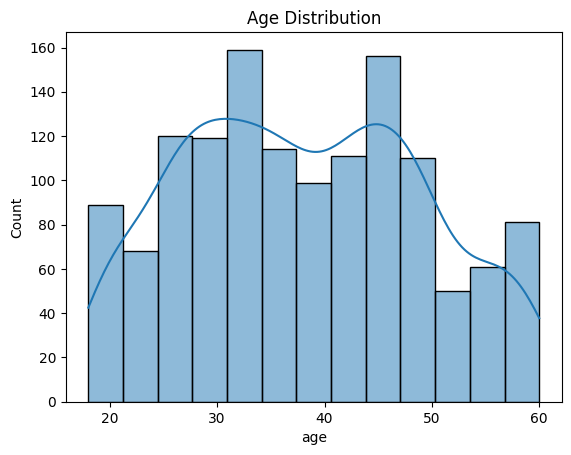

In [21]:
sns.histplot(df['age'], kde= True)
plt.title('Age Distribution')

* **As per Age distribution chart most of the insurance claimend by person whose age is between 25-50 years.**

In [22]:
px.scatter(df,y = "bmi",x = "claim",title ='Claim by BMI', template='presentation', trendline = 'lowess', trendline_color_override='orange', width=700)

* **BMI (Body mass index) affect on claim amount**

In [23]:
px.scatter(df,y = "bloodpressure",x = "claim",title ='Claim by Bloodpressure', template='presentation', trendline = 'lowess', trendline_color_override='orange', width=700)

* **As per trendline with high bloodpressure claim amount will increase**


In [24]:
px.funnel(df.groupby('children').count(), 'PatientID', title='Number of Person by number of Child', template='presentation', width=700)

* **Paitent's With 0 Child Claimed More Insurance As Compared to Other Patient's**

In [25]:
px.scatter(df, 'age', 'claim', 'smoker', title= 'Impact of Smoking on claim', template="presentation", width=700)

* **Claim Amount is high for person with smoking habit.**

In [26]:
px.pie(df, 'smoker', labels='smoker', title = 'Smoker', template='presentation', hole=.5, width=500).update_traces(textinfo='percent+label')

* **Almost 80% of the insurance claimed by Non smoker persons.**

In [27]:
px.pie(df, 'region', labels='region', title = 'Region', template='presentation', width=500).update_traces(textinfo='percent+label')

* **Persons from Northeast region claimed less numbor of insurance compare to other regions**
* **Persons from Southeast region claimed more number of insurance compare to other regions**

<Axes: xlabel='claim', ylabel='Count'>

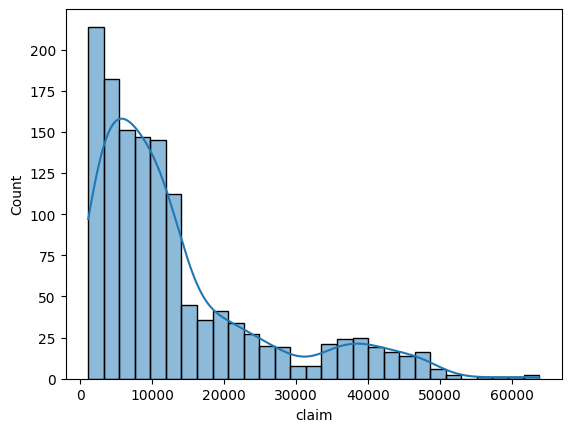

In [28]:
sns.histplot(df.claim, kde= True)

* **Most number of persons claimed for 1000-15000**

In [29]:
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
0,1,39,male,23.2,91,Yes,0,No,southeast,1121
1,2,24,male,30.1,87,No,0,No,southeast,1131
2,3,34,male,33.3,82,Yes,0,No,southeast,1135
3,4,34,male,33.7,80,No,0,No,northwest,1136
4,5,34,male,34.1,100,No,0,No,northwest,1137
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44,female,35.5,88,Yes,0,Yes,northwest,55135
1336,1337,59,female,38.1,120,No,1,Yes,northeast,58571
1337,1338,30,male,34.5,91,Yes,3,Yes,northwest,60021


#**Preparing Data for Model**
* **Male = 0 , Female = 1 : gender**
* **Yes = 0, No = 1 : Diabetic**
* **Yes = 1, No = 0 : Smoker**

In [30]:
df2 = df.copy()

In [31]:
list(enumerate(df2.gender.unique()))

[(0, 'male'), (1, 'female')]

In [32]:
gender_map = {j : i for i, j in enumerate(df2.gender.unique())}
gender_map

{'male': 0, 'female': 1}

In [33]:
df2.gender = df2.gender.map(gender_map)

In [34]:
df2.diabetic = df2.diabetic.map({j : i for i, j in enumerate(df2.diabetic.unique())})

In [35]:
df2.smoker = df2.smoker.map({j : i for i , j in enumerate(df2.smoker.unique())})

In [36]:
df2

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
0,1,39,0,23.2,91,0,0,0,southeast,1121
1,2,24,0,30.1,87,1,0,0,southeast,1131
2,3,34,0,33.3,82,0,0,0,southeast,1135
3,4,34,0,33.7,80,1,0,0,northwest,1136
4,5,34,0,34.1,100,1,0,0,northwest,1137
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44,1,35.5,88,0,0,1,northwest,55135
1336,1337,59,1,38.1,120,1,1,1,northeast,58571
1337,1338,30,0,34.5,91,0,3,1,northwest,60021


In [37]:
px.box(df2, 'claim', width=500)

In [38]:
def remove_outlier(df_name, col_name):
  q1 = df_name[col_name].quantile(.25)
  q3 = df_name[col_name].quantile(.75)
  iqr = q3 - q1
  upper = q3 + (1.5 * iqr)
  lower = q1 - (1.5 * iqr)
  out = df_name.loc[(df_name[col_name] < upper) & (df_name[col_name] > lower)]
  return out

In [39]:
def only_iqr(df_name, col_name):
  q1 = df_name[col_name].quantile(.25)
  q3 = df_name[col_name].quantile(.75)
  iqr = q3 - q1
  out = df_name.loc[(df_name[col_name] < q3) & (df_name[col_name] > q1)]
  return out

In [40]:
df2 = only_iqr(df2, 'claim')
df2 = only_iqr(df2, 'claim')

In [41]:
df2

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
505,506,34,1,26.2,88,0,1,0,southeast,7046
506,507,56,1,32.9,84,0,0,0,southeast,7050
507,508,26,1,29.0,93,1,1,0,southwest,7050
508,509,33,1,25.5,87,1,1,0,southeast,7077
509,510,50,1,20.0,89,0,2,0,southeast,7133
...,...,...,...,...,...,...,...,...,...,...
833,834,25,1,30.5,110,1,0,0,northwest,11840
834,835,45,1,29.0,87,1,0,0,southwest,11842
835,836,33,1,31.8,95,1,0,0,northwest,11842


#**Model**

**Split Data into two parts Independent and Dependent Variables**

In [42]:
x = df2.iloc[:, [1,2,3,4,5,6,7]] # Independent variables for model

In [43]:
y = df2[['claim']] # Dependent Variables for Model

**Loading requared libraries**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Split data for Train and Text**

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

**Creating model**

In [46]:
Model = LinearRegression()

**Training the Model**

In [47]:
Model.fit(x_train, y_train)

LinearRegression()

**Predict the test data**

In [48]:
y_pred = Model.predict(x_test)

In [49]:
mean_absolute_error(y_test, y_pred)

1046.8026699712816